<a href="https://colab.research.google.com/github/ninajung/Test/blob/main/Programmierprojekt_EwA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

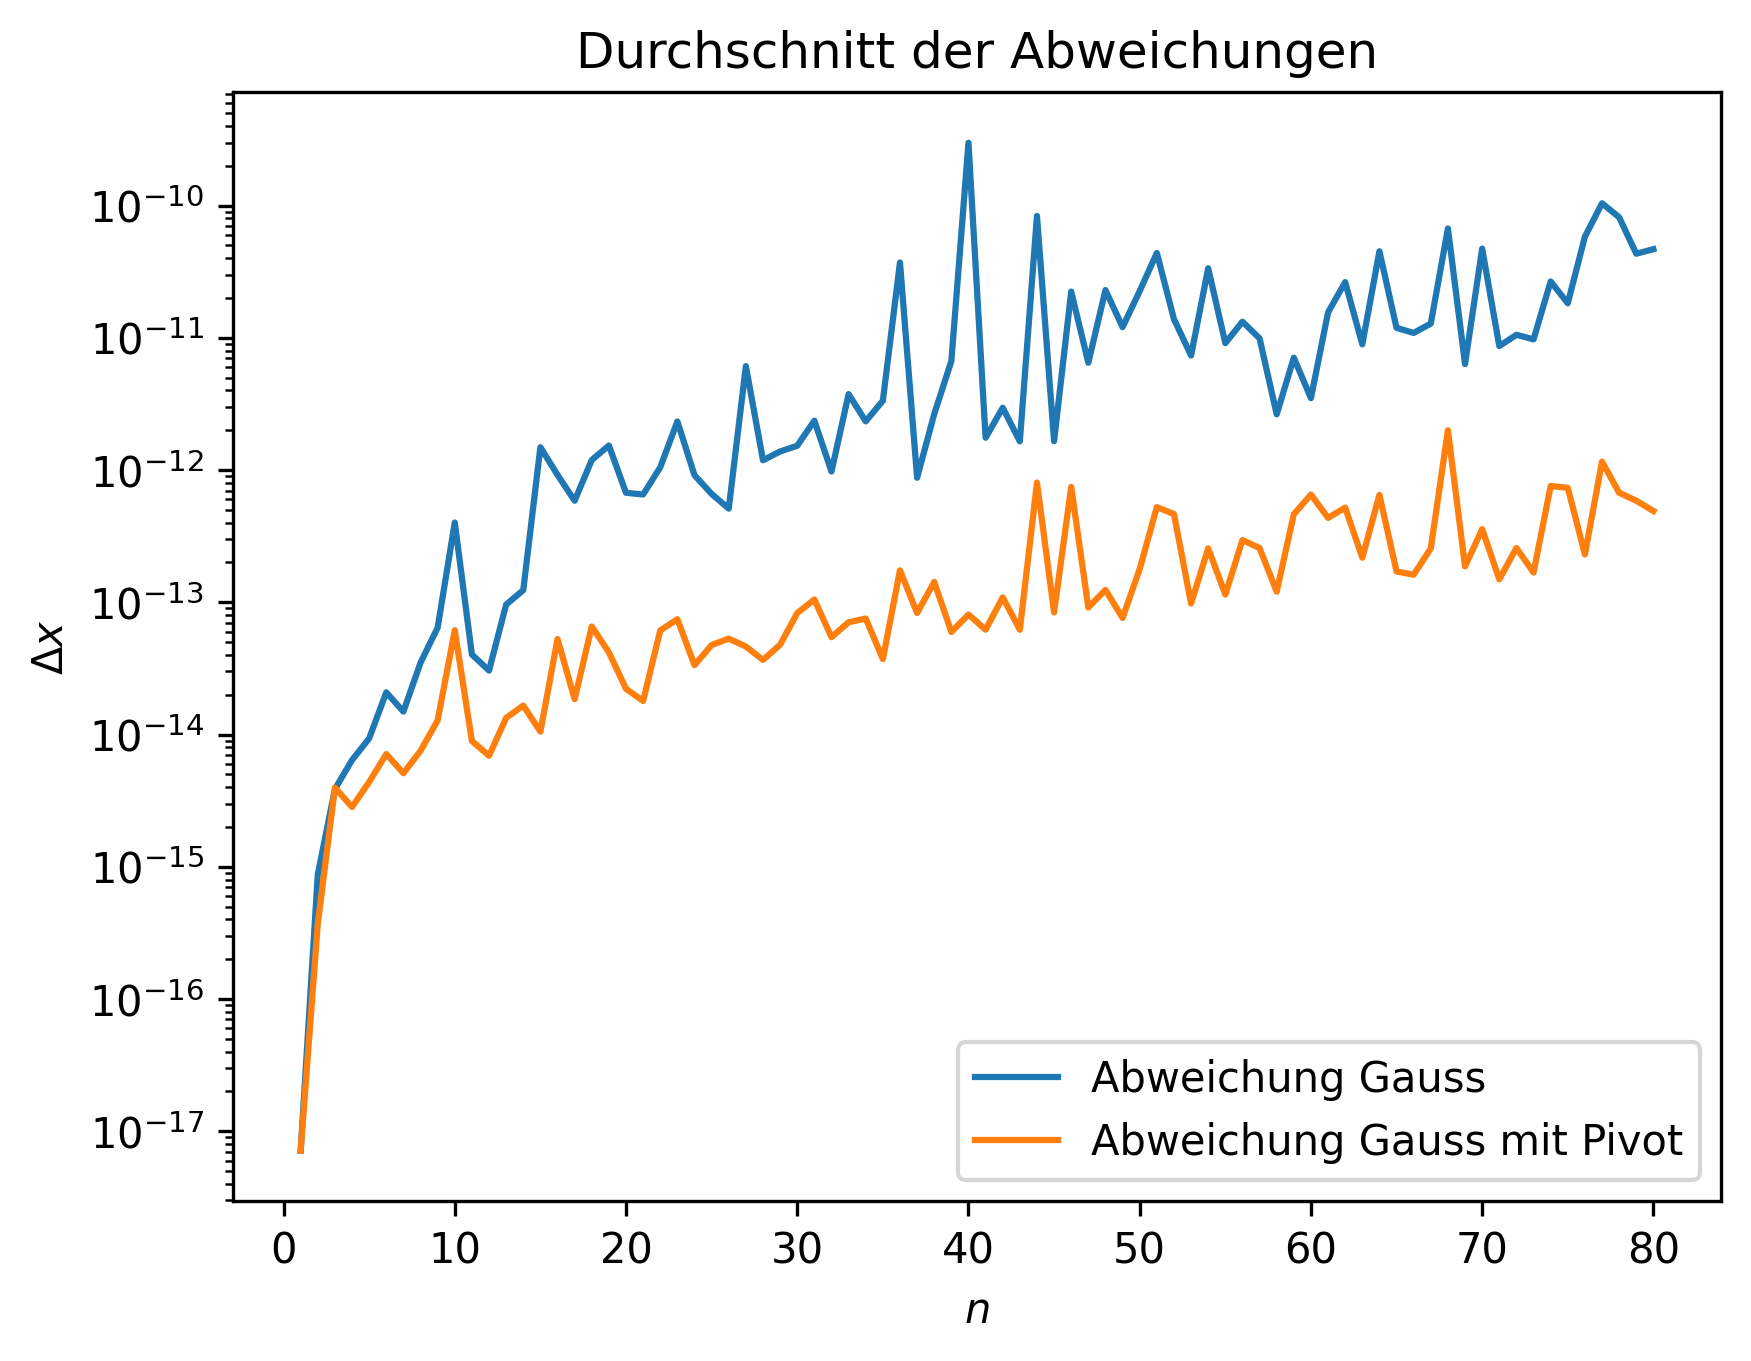

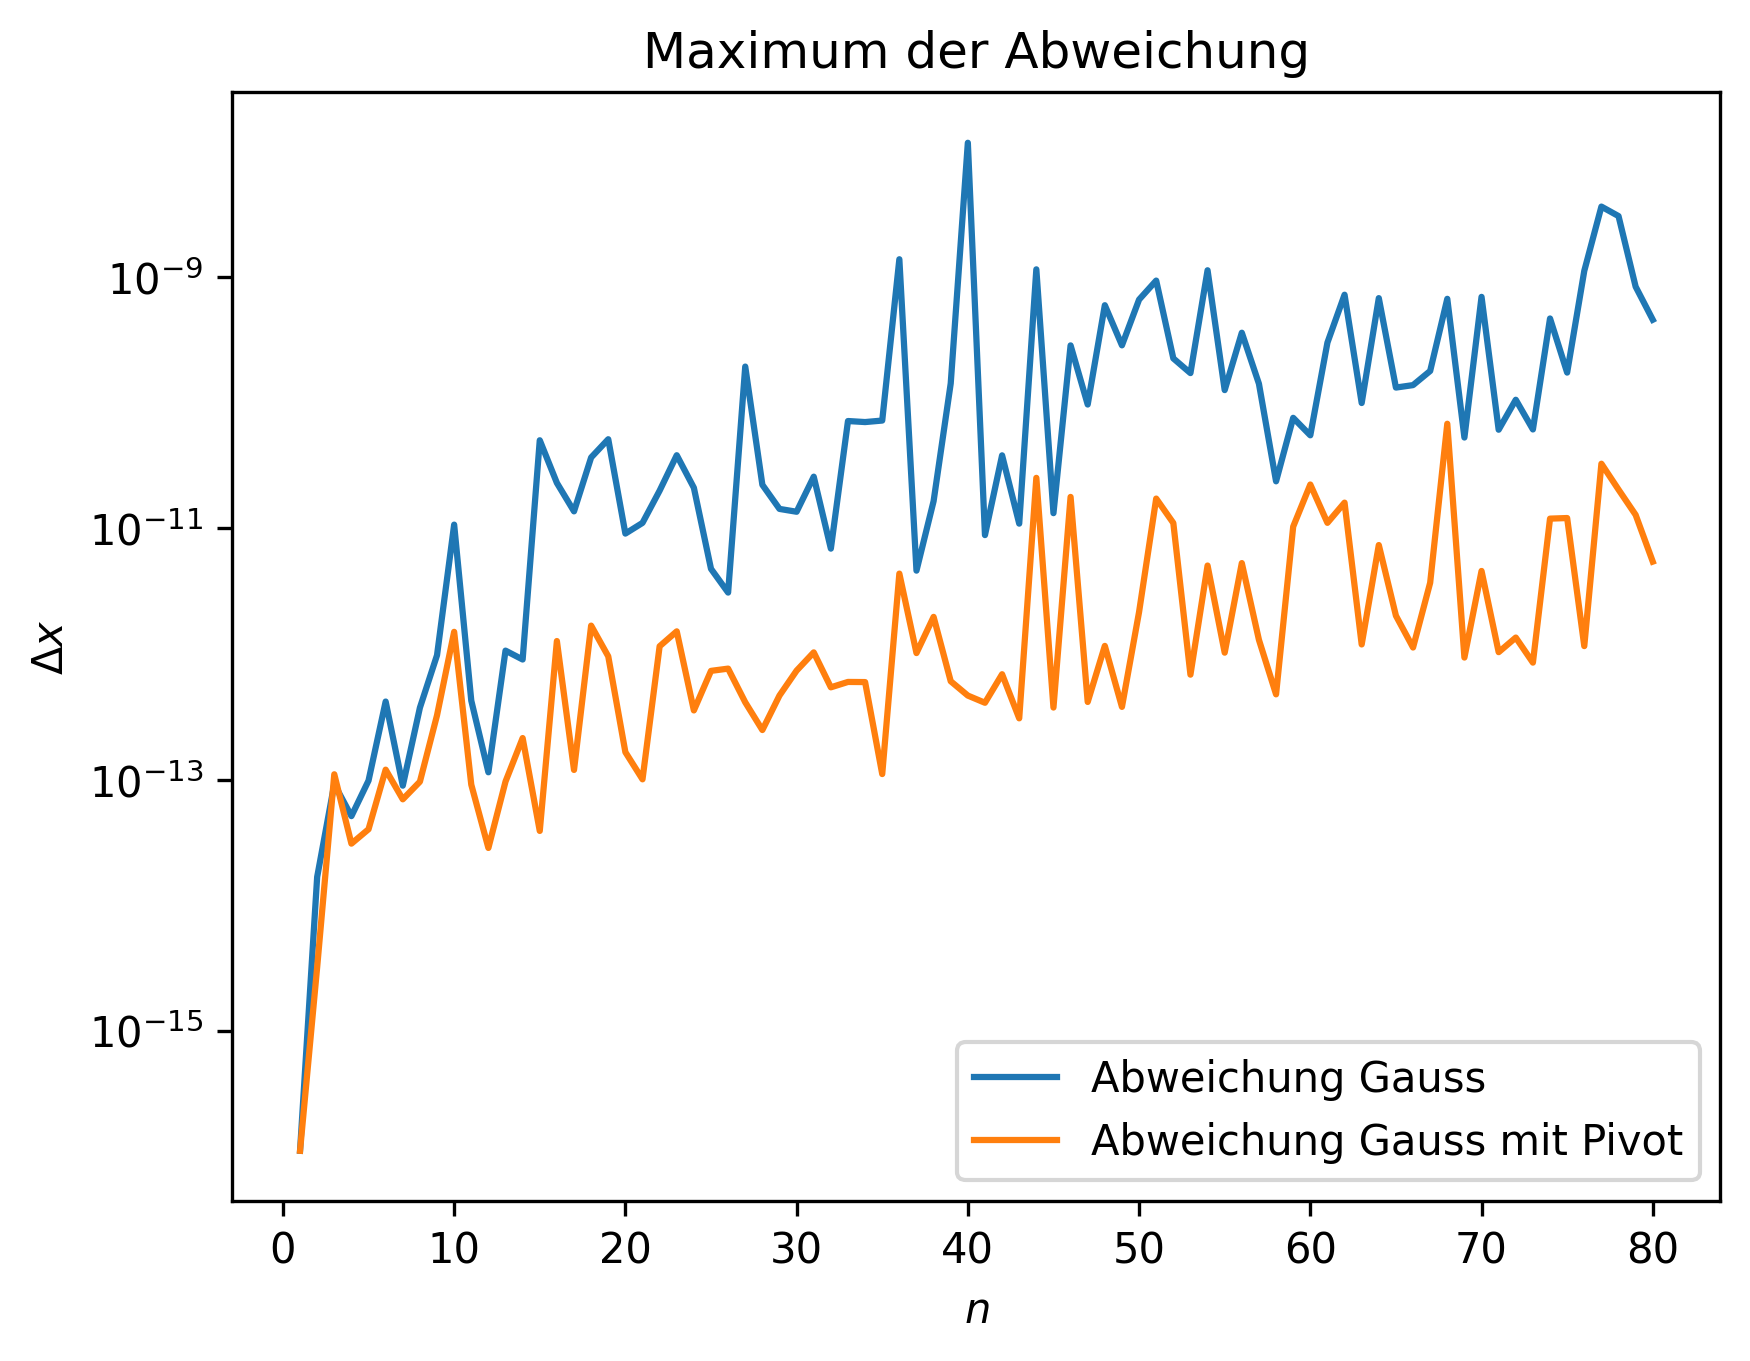

'm_g = np.zeros(100)\nm_gp = np.zeros(100)\nfor j in range(100):\n  C = np.random.random((4,4))*10\n  c = np.random.random((4,1))*10\n  d = C@c\n  C1 = cp.deepcopy(C)\n  d1 = cp.deepcopy(d)\n  gauss(C, d)\n  gauss_pivot(C1, d1)\n  c1 = backwards_subs(C, d)\n  c2 = backwards_subs(C1, d1)\n  m_g[j] = fehler(c, c1)\n  m_gp[j] = fehler(c, c2)\n  #print("Durchlauf " + str(j+1))\n  #print("Fehler gauss: \n", fehler(c, c1))\n  #print("Fehler gauss-pivot: \n",fehler(c, c2))\n\nprint("mean error gauss: \n", np.mean(m_g))\nprint("mean error gauss-pivot: \n", np.mean(m_gp))\n\nprint("max error gauss: \n", np.max(m_g))\nprint("max error gauss-pivot: \n", np.max(m_gp))'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy as cp
import time as tm

def gauss(A,b):
  n = np.size(A,0)
  for i in range(n):
    if(A[i,i] == 0):
      for j in range(i+1,n):
        if(A[j,i] != 0):
          B = np.copy(A[i,:])
          A[i,:] = A[j,:]
          A[j,:] = B
          b1 = np.copy(b[i])
          b[i] = b[j]
          b[j] = b1
          break
    for k in range(i+1,n):
      elim = A[k,i] / A[i,i]
      A[k,:] = A[k,:] - elim * A[i,:]
      b[k] = b[k] - elim * b[i]
  return

def gauss_pivot(A,b):
  n = np.size(A,0)
  for i in range(n):
    index = i
    max = np.abs(A[i,i])
    for j in range(i+1,n):
      if(np.abs(A[j,i]) > max):
        index = j
        max = np.abs(A[j,i])
    if(index != i):
      B = np.copy(A[i,:])
      A[i,:] = A[index,:]
      A[index,:] = B
      b1 = np.copy(b[i])
      b[i] = b[index]
      b[index] = b1
    for k in range(i+1,n):
      elim = A[k,i] / A[i,i]
      A[k,:] = A[k,:] - elim * A[i,:]
      b[k] = b[k] - elim * b[i]
  return

def backwards_subs(A,b):
  n = np.size(A,0)
  x = np.zeros((n,1))
  for i in range(n-1, -1, -1):
    x[i] =(b[i] - np.dot(A[i, (i+1):], x[(i+1):])) / A[i, i]
  return x

def laufzeit_gauss(A,b):
  t1 = tm.perf_counter()
  gauss(A,b)
  t2 = tm.perf_counter()
  return t2 - t1

def laufzeit_gauss_pivot(A,b):
  t1 = tm.perf_counter()
  gauss_pivot(A,b)
  t2 = tm.perf_counter()
  return t2 - t1

def fehler(x,y):
  return np.linalg.norm(x-y)

def zufall(n):
  A = np.random.random((n,n)) #random gibt Zufallszahlen im Intervall [0,1)
  x = np.random.random((n,1))
  b = A@x
  return A, x, b

def test(n,m):
  time_gauss = np.zeros(n)
  time_gauss_pivot = np.zeros(n)

  error_max_gauss = np.zeros(n)
  error_max_gauss_pivot = np.zeros(n)

  error_mean_gauss = np.zeros(n)
  error_mean_gauss_pivot = np.zeros(n)
  for i in range(1,n+1):
    time1 = np.zeros(m)
    time2 = np.zeros(m)

    error1 = np.zeros(m)
    error2 = np.zeros(m)

    for j in range(m):
      A, x, b = zufall(i)
      A1 = cp.deepcopy(A)
      b1 = cp.deepcopy(b)

      time1[j] = laufzeit_gauss(A,b)
      time2[j] = laufzeit_gauss_pivot(A1,b1)

      x1 = backwards_subs(A,b)
      x2 = backwards_subs(A1,b1)
      error1[j] = fehler(x, x1)
      error2[j] = fehler(x, x2)
    time_gauss[i-1] = np.mean(time1)
    time_gauss_pivot[i-1] = np.mean(time2)

    error_max_gauss[i-1] = np.max(error1)
    error_max_gauss_pivot[i-1] = np.max(error2)

    error_mean_gauss[i-1] = np.mean(error1)
    error_mean_gauss_pivot[i-1] = np.mean(error2)
  return time_gauss, time_gauss_pivot, error_max_gauss, error_max_gauss_pivot, error_mean_gauss, error_mean_gauss_pivot

def print_time(time_g, time_g_p):
  t = np.linspace(1, n, n)
  plt.figure(dpi = 300)
  plt.plot(t, time_g, label = 'Laufzeit Gauss')
  plt.plot(t, time_g_p, label = 'Laufzeit Gauss mit Pivot')
  plt.xlabel('$n$')
  plt.ylabel('$t$ in ms')
  plt.title('Laufzeitvergleich')
  plt.legend()
  #plt.savefig('Laufzeit-Pgp')
  plt.show()
  return

def print_error_mean(error_g, error_g_p):
  t = np.linspace(1, n, n)
  plt.figure(dpi = 300)
  plt.semilogy(t, error_g, label = 'Abweichung Gauss')
  plt.semilogy(t, error_g_p, label = 'Abweichung Gauss mit Pivot')
  plt.xlabel('$n$')
  plt.ylabel('$\Delta x$')
  plt.title('Durchschnitt der Abweichungen')
  plt.legend()
  #plt.xscale('linear')
  plt.savefig('Durchschnitt-Pgp')
  plt.show()
  return

def print_error_max(error_g, error_g_p):
   t = np.linspace(1, n, n)
   plt.figure(dpi = 300)
   plt.semilogy(t, error_g, label = 'Abweichung Gauss')
   plt.semilogy(t, error_g_p, label = 'Abweichung Gauss mit Pivot')
   plt.xlabel('$n$')
   plt.ylabel('$\Delta x$')
   plt.title('Maximum der Abweichung')
   plt.legend()
   plt.savefig('Maximum-Pgp')
   plt.show()
   return

n = 80; m = 40

time_g, time_g_p, error_ma_g, error_ma_g_p, error_me_g, error_me_g_p = test(n,m)
#print_time(time_g, time_g_p)
print_error_mean(error_me_g, error_me_g_p)
print_error_max(error_ma_g, error_ma_g_p)

'''B = np.array([[5.,7.,6.,5.],[7.,10.,8.,7.],[6.,8.,10.,9.],[5.,7.,9.,10.]])
x = np.array([1.,1.,1.,1.])
z = B@x
B1 = cp.deepcopy(B)
z1 = cp.deepcopy(z)
gauss(B, z)
gauss_pivot(B1, z1)
x1 = backwards_subs(B, z)
x2 = backwards_subs(B1, z1)
print("x: \n", x)
print("x gauss: \n", x1)
print("x gauss-pivot: \n", x2)
print("Fehler gauss: \n", fehler(x, x1))
print("Fehler gauss-pivot: \n",fehler(x, x2))'''

'''m_g = np.zeros(100)
m_gp = np.zeros(100)
for j in range(100):
  C = np.random.random((4,4))*10
  c = np.random.random((4,1))*10
  d = C@c
  C1 = cp.deepcopy(C)
  d1 = cp.deepcopy(d)
  gauss(C, d)
  gauss_pivot(C1, d1)
  c1 = backwards_subs(C, d)
  c2 = backwards_subs(C1, d1)
  m_g[j] = fehler(c, c1)
  m_gp[j] = fehler(c, c2)
  #print("Durchlauf " + str(j+1))
  #print("Fehler gauss: \n", fehler(c, c1))
  #print("Fehler gauss-pivot: \n",fehler(c, c2))

print("mean error gauss: \n", np.mean(m_g))
print("mean error gauss-pivot: \n", np.mean(m_gp))

print("max error gauss: \n", np.max(m_g))
print("max error gauss-pivot: \n", np.max(m_gp))'''
